## Strandard Import

In [1]:
# Import necessary modules and functions

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

import warnings
warnings.filterwarnings('ignore')

## Explore Data

### Import Data

In [2]:
df_ks_to_display = pd.read_csv('KS_train_data.csv', delimiter= ',')

### Describe Data

#### Numerical Features

In [3]:
df_ks_to_display.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,launched_at,pledged,usd_pledged
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,151.089430,1.241108e+04,1.400524e+09,1.406896e+09,1.017654,4.447512e+04,1.403972e+09,1.312485e+04,1.241284e+04
std,1163.024964,1.005545e+05,6.334581e+07,6.340574e+07,0.169773,1.256033e+06,6.360489e+07,1.080345e+05,1.005368e+05
min,0.000000,0.000000e+00,1.240366e+09,1.243556e+09,0.009337,1.000000e-02,1.240674e+09,0.000000e+00,0.000000e+00
25%,4.000000,1.250000e+02,1.349203e+09,1.357171e+09,1.000000,1.500000e+03,1.354313e+09,1.250000e+02,1.250000e+02
50%,28.000000,1.650000e+03,1.408426e+09,1.415244e+09,1.000000,5.000000e+03,1.412373e+09,1.635500e+03,1.651000e+03
75%,86.000000,6.271250e+03,1.447206e+09,1.454243e+09,1.000000,1.200000e+04,1.451252e+09,6.310000e+03,6.275042e+03
max,105857.000000,1.026684e+07,1.517539e+09,1.518702e+09,1.401112,1.000000e+08,1.518037e+09,1.026685e+07,1.026685e+07


We have noticed that the goals of these projects are not using the same currency unit.

#### Goal

In [3]:
df_ks_to_display['usd_goal'] = df_ks_to_display['goal'] * df_ks_to_display['fx_rate']
df_ks_to_display['usd_goal'].describe()

count    1.000000e+05
mean     4.052436e+04
std      1.191352e+06
min      1.000000e-02
25%      1.500000e+03
50%      5.000000e+03
75%      1.200000e+04
max      1.401112e+08
Name: usd_goal, dtype: float64

#### Percentage of Success

In [4]:
df_ks_to_display['pt_success'] = df_ks_to_display['usd_pledged'] / df_ks_to_display['usd_goal']
df_ks_to_display['pt_success'].describe()


count    100000.000000
mean          3.282139
std         165.490788
min           0.000000
25%           0.028995
50%           1.017750
75%           1.232006
max       41535.010000
Name: pt_success, dtype: float64

In [6]:
#Data is too large to be plotted, the statement below does not work
#sns.displot(df_ks_to_display['pt_success'])

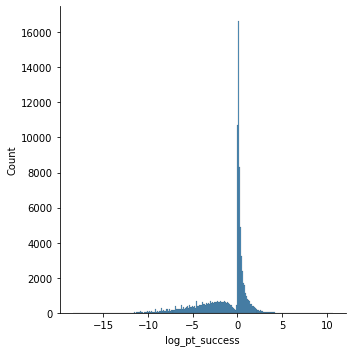

In [5]:
#Logarize the percentages of success to plot them
df_ks_to_display['log_pt_success'] = np.log(df_ks_to_display['pt_success'])
sns.displot(df_ks_to_display['log_pt_success'])

#### Promotion Duration

In [6]:
duration_dis = pd.to_datetime(df_ks_to_display['deadline'], unit='s') - pd.to_datetime(df_ks_to_display['launched_at'], unit='s')

# translate the yyyy-mm-dd format to int
df_ks_to_display['promotion_duration'] = duration_dis / np.timedelta64(1, 'D')

df_ks_to_display['promotion_duration'].describe()

count    100000.000000
mean         33.840738
std          12.953758
min           1.000000
25%          30.000000
50%          30.000000
75%          36.000000
max          91.958333
Name: promotion_duration, dtype: float64

### Missing Data and Outlier Detection

#### **Outlier Detection**

**pt_success outliers**

In [7]:
outliers = df_ks_to_display.index[df_ks_to_display['pt_success'] > 5]
print(outliers)

Int64Index([    7,    70,    97,   100,   145,   170,   181,   252,   253,
              274,
            ...
            98397, 98740, 98762, 98803, 98806, 98956, 98959, 99095, 99472,
            99990],
           dtype='int64', length=3189)


**Typical Extreme case**

```
index = 54553
goal = 1
pledged = 41535
category = game
```

**Kill outliers**

In [8]:
#df_ks_to_display.drop(outliers, inplace=True)

**Check new data**

In [9]:
df_ks_to_display['pt_success'].describe()

count    96811.000000
mean         0.847285
std          0.846888
min          0.000000
25%          0.024325
50%          1.012000
75%          1.194131
max          5.000000
Name: pt_success, dtype: float64

#### Clear invalid data

In [10]:
hm_features = ['backers_count', 'converted_pledged_amount','promotion_duration','usd_goal', 'staff_pick','pt_success',]
nulls = df_ks_to_display[hm_features].isnull().sum()
print(nulls)

backers_count               0
converted_pledged_amount    0
promotion_duration          0
usd_goal                    0
staff_pick                  0
pt_success                  0
dtype: int64


### Explore other features

#### **Category**

**A boxplot for the percentages of success versus the categories**

<AxesSubplot:xlabel='pt_success', ylabel='category'>

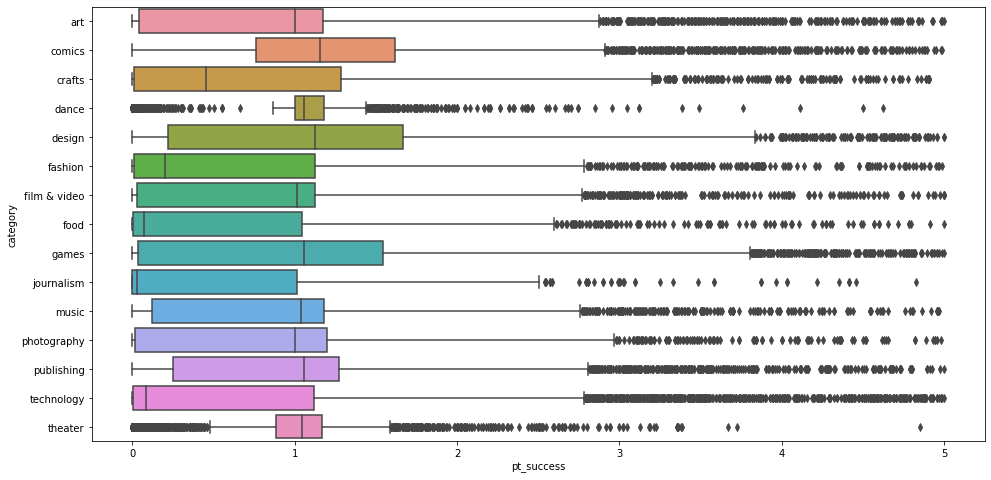

In [11]:
sns.boxplot(df_ks_to_display['pt_success'], df_ks_to_display['category'])

**Logarize pt_success for better visual effect**

<AxesSubplot:xlabel='log_pt_success', ylabel='category'>

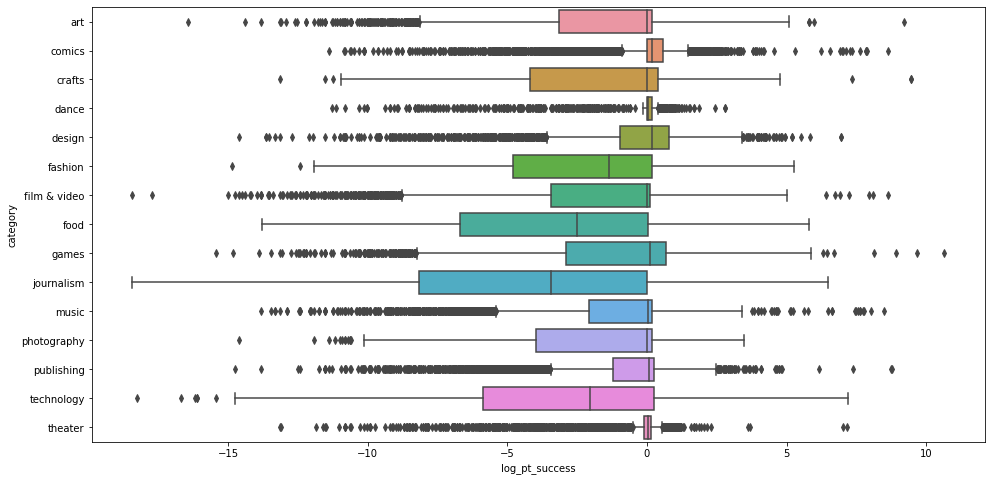

In [14]:
sns.boxplot(df_ks_to_display['log_pt_success'], df_ks_to_display['category'])

#### Sub-catetory

In [15]:
df_ks_to_display['subcategory'].describe()

count     100000
unique       158
top          web
freq        2302
Name: subcategory, dtype: object

**The ten most frequently occurring subcategories**

In [16]:
n = 10
sc_top_10 = df_ks_to_display['subcategory'].value_counts()[:n].index
print(sc_top_10)

Index(['web', 'product design', 'shorts', 'documentary', 'hardware',
       'indie rock', 'nonfiction', 'fiction', 'rock', 'mixed media'],
      dtype='object')


**A boxplot for the logarithms of percentages of success versus the top ten subcategories**

<AxesSubplot:xlabel='log_pt_success', ylabel='subcategory'>

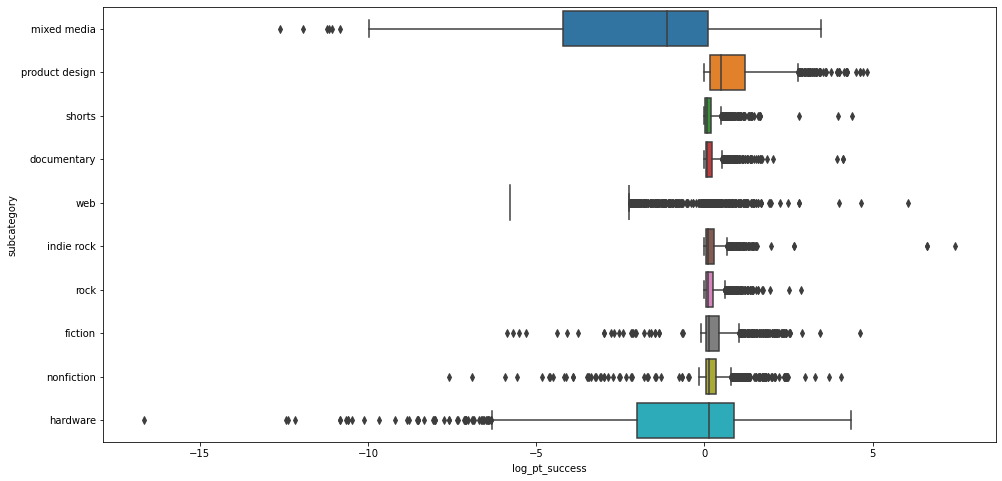

In [17]:
top_scs = df_ks_to_display.loc[df_ks_to_display['subcategory'].isin(sc_top_10)]
sns.boxplot(top_scs['log_pt_success'], top_scs['subcategory'])

#### **Country**

In [18]:
df_ks_to_display['country'].describe()

count     99997
unique      174
top          US
freq      76716
Name: country, dtype: object

**Top 10 countries**

In [13]:
n = 10
top_10 = df_ks_to_display['country'].value_counts()[:n].index
print(top_10)

Index(['US', 'GB', 'CA', 'AU', 'DE', 'FR', '?', 'NL', 'IT', 'ES'], dtype='object')


**Select top 10 countries records**

In [14]:
tops = df_ks_to_display.loc[df_ks_to_display['country'].isin(top_10)]
print(tops)

      project_id  backers_count  \
0      KS_000000             80   
1      KS_000001             82   
2      KS_000002             21   
3      KS_000003             37   
4      KS_000004            153   
...          ...            ...   
99995  KS_099995            104   
99996  KS_099996            307   
99997  KS_099997            143   
99998  KS_099998            329   
99999  KS_099999            145   

                                                   blurb category  \
0      I will be an artist-in-residence at Elsewhere ...      art   
1      1000 Artists is a public art-making installati...      art   
2      The Sequel to ‘My Favorite Machine”, "MyPhoneH...      art   
3      A film exploring the role and value of art edu...      art   
4      We need to build a kitchen for Habitable Space...      art   
...                                                  ...      ...   
99995  Make the workshop/ small stage space at Jimmy'...  theater   
99996  Help create a perman

**A boxplot for the percentages of success versus the top ten countries**

<AxesSubplot:xlabel='pt_success', ylabel='country'>

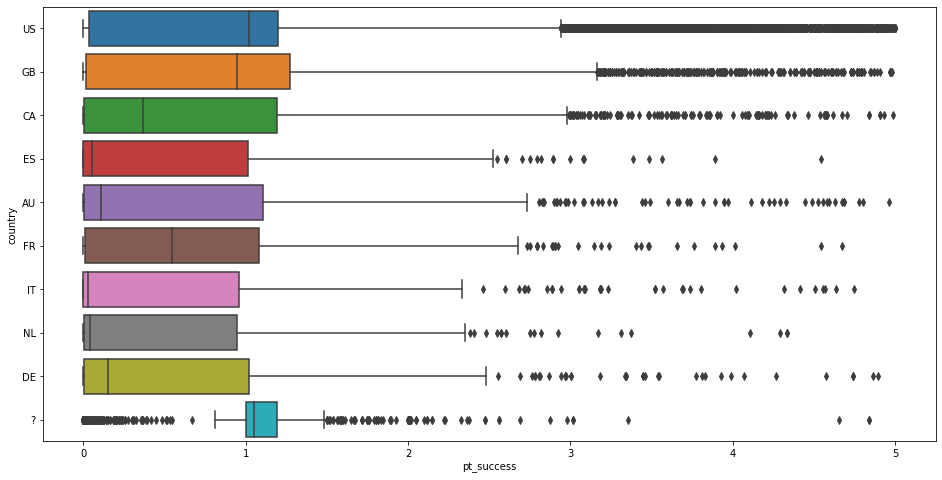

In [15]:
sns.boxplot(tops['pt_success'], tops['country'])

**A boxplot for the logarithms of percentages of success versus the top ten countries**

<AxesSubplot:xlabel='log_pt_success', ylabel='country'>

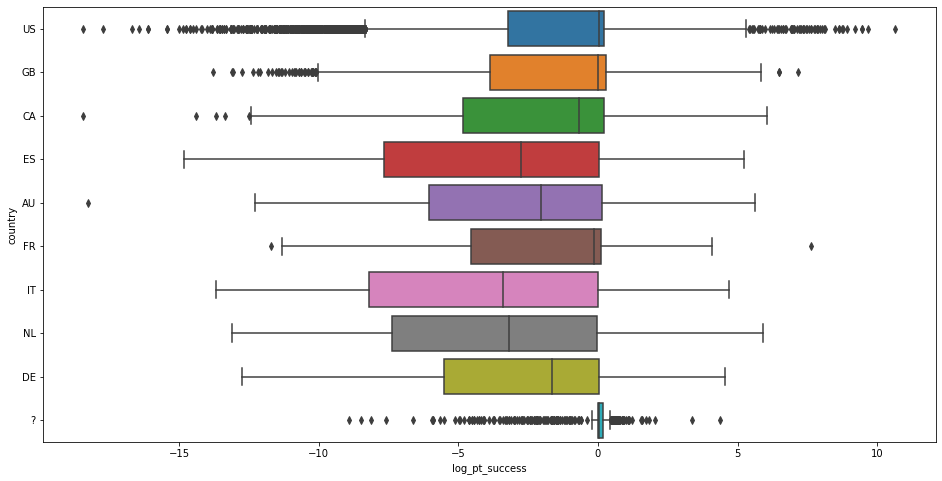

In [22]:
sns.boxplot(tops['log_pt_success'], tops['country'])

#### Count Blurb length

In [16]:
df_ks_to_display['blurb_length'] = df_ks_to_display['blurb'].str.len()

In [17]:
df_ks_to_display['blurb_length'].describe()

count    96809.000000
mean       115.200250
std         24.731687
min          1.000000
25%        106.000000
50%        125.000000
75%        133.000000
max        150.000000
Name: blurb_length, dtype: float64

In [25]:
# Cannot be plotted
# sns.boxplot(df_ks_to_display['log_pt_success'], df_ks_to_display['blurb_length'])

#### **HeatMap**

<AxesSubplot:>

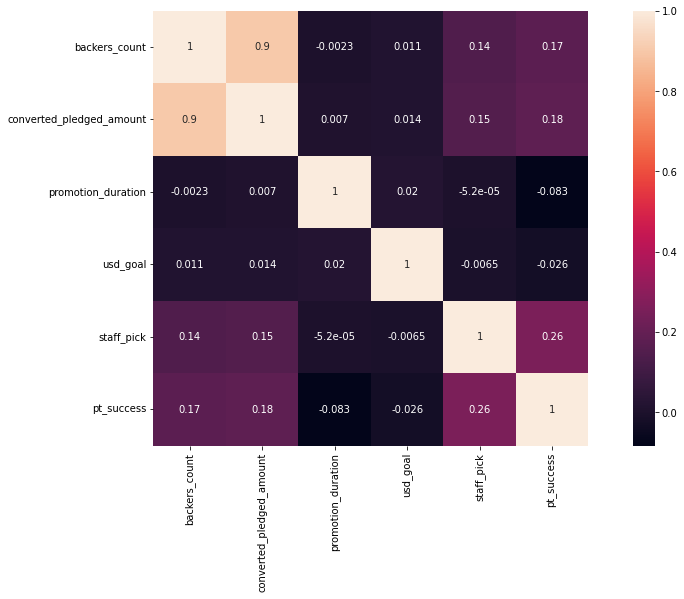

In [18]:
corrmat_all = df_ks_to_display[hm_features].corr()
sns.heatmap(corrmat_all,square=True, annot=True)

**Logarize the converted goal to plot the heatmap**

In [27]:
df_ks_to_display['log_usd_goal'] = np.log(df_ks_to_display['usd_goal'])

In [28]:
hm_features = ['blurb_length','promotion_duration','log_usd_goal', 'staff_pick','log_pt_success']

<AxesSubplot:>

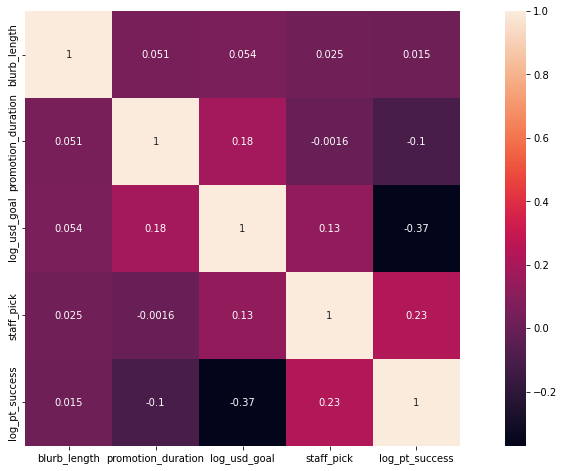

In [29]:
corrmat_all = df_ks_to_display[hm_features].corr()
sns.heatmap(corrmat_all,square=True, annot=True)